In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
import pprint
glass = fetch_ucirepo(id=42) #klasifikacija na vidovi na stakla spored nivniot hemiski sostav
X = glass.data.features #atributi
y = glass.data.targets #vrednosti za celnata promenliva

pprint.pp(glass.metadata)

{'uci_id': 42,
 'name': 'Glass Identification',
 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification',
 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv',
 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in '
             'terms of their oxide content (i.e. Na, Fe, K, etc)',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 214,
 'num_features': 9,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Type_of_glass'],
 'index_col': ['Id_number'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1987,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5WW2P',
 'creators': ['B. German'],
 'intro_paper': None,
 'additional_info': {'summary': 'Vina conducted a comparison test of her '
                                'rule-based system, BEAGLE, the '
                                'neare

In [44]:
#target_names = np.unique(Y)
#number_of_classes=len(target_names)
#feature_names=np.unique(X)
#number_of_features = len(feature_names)
#print("Број и имиња на класи:",number_of_classes,target_names)

#feature_names = glass.metadata.features  
feature_names = list(X.columns)
target_names = np.unique(y) 

number_of_classes = len(target_names) 
number_of_features = X.shape[1]  
number_of_instances = X.shape[0]  

print("Број и имиња на класи:", number_of_classes, target_names)
print("Број и имиња на атрибути:", number_of_features, feature_names)
print("Број на податочни примероци:", number_of_instances)

Број и имиња на класи: 6 [1 2 3 5 6 7]
Број и имиња на атрибути: 9 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Број на податочни примероци: 214


In [4]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [6]:
df = pd.DataFrame(glass.data.features, columns=glass.data.feature_names)
print(df.head(10))

        RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [9]:
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

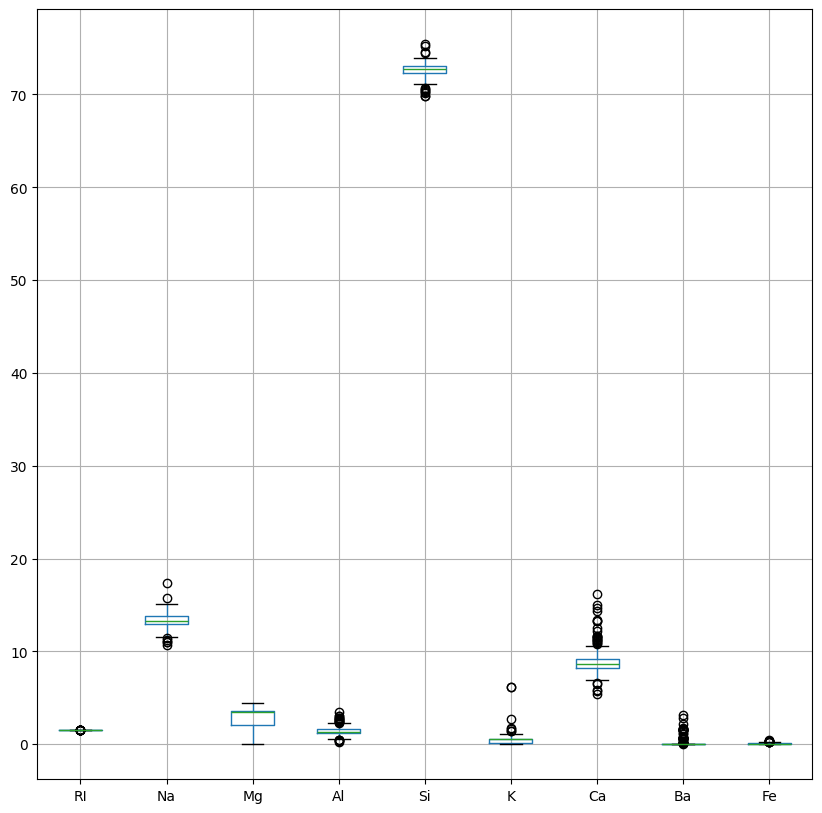

In [29]:
#VIZUELIZACIJA
figure = plt.figure(figsize=(10, 10))
df.boxplot()
plt.show()

In [90]:
from scipy.stats import zscore

df = pd.DataFrame(X, columns=glass.feature_names)

#Kalkuliraj Z-scores za site numerichki koloni
z_scores = df.apply(zscore)

#identifikuvame outlieri, vo sluchajov zedov z_score > 3
outliers = (z_scores.abs() > 3).any(axis=1)

num_outliers = outliers.sum()
outlier_samples = df[outliers]

print(f"Број на outliers: {num_outliers}")
print("Outlier примероци:")
print(outlier_samples)


Број на outliers: 20
Outlier примероци:
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10
145  1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35
162  1.52211  14.19  3.78  0.91  71.36  0.23   9.14  0.00  0.37
163  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00
171  1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00
172  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00
174  1.52058  12.85  1.61  2.17  72.18  0.76   9.70  0.24  0.51
184  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00


In [ ]:
#Atributite Ba, Mg, K, i Ca imaat golemi otstapuvanja, pa poradi toa jas bi gi otsranila.

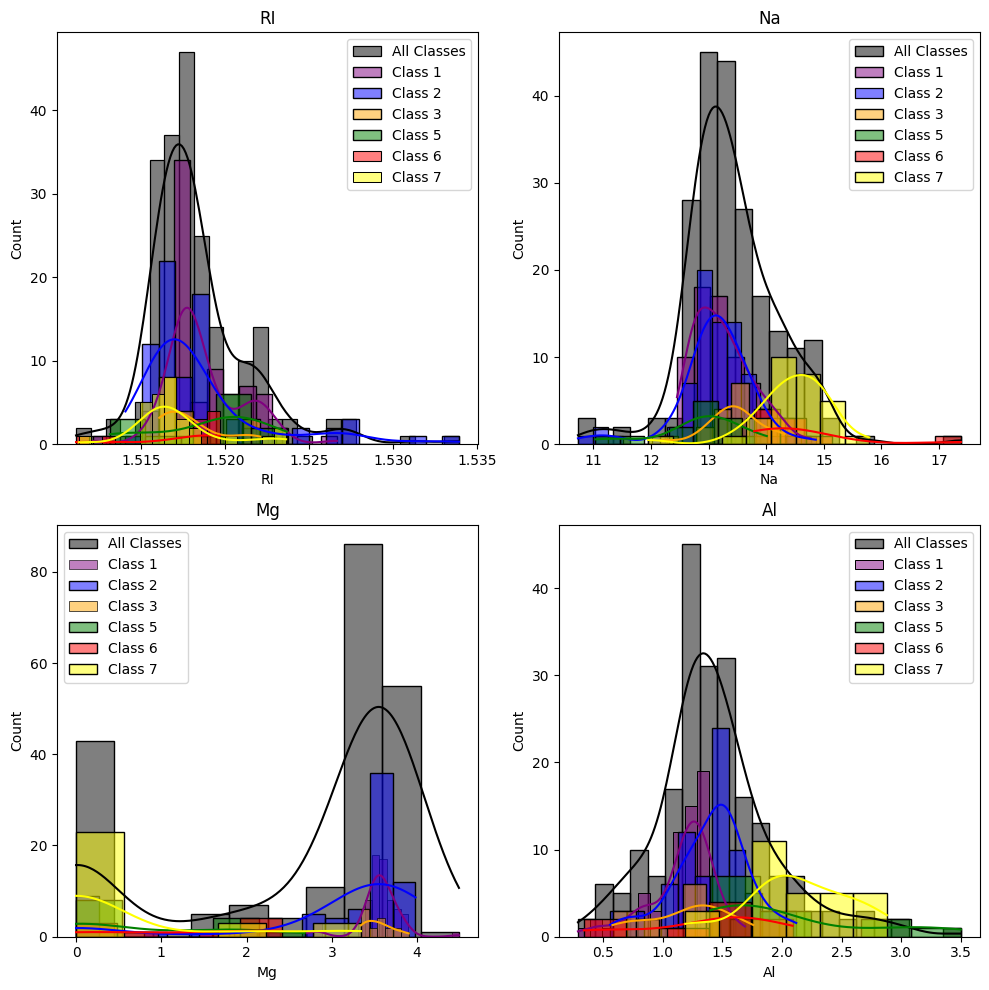

In [48]:
colors = ['purple', 'blue', 'orange', 'green','red', 'yellow']
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=2)

for feature in range(min(4, number_of_features)):  # Limit to 4 features for 2x2 subplot
    ax = plt.subplot(2, 2, feature + 1)
    plt.title(feature_names[feature])

    # Plot for all classes
    sns.histplot(X.iloc[:, feature], color='black', label='All Classes', kde=True, stat="count")

    # Plot for each class
    for class_idx, class_label in enumerate(np.unique(y)):  
        sns.histplot(X.iloc[y.flatten() == class_label, feature],  # Fixed: removed `.values`
                     color=colors[class_idx % len(colors)],  
                     label=f"Class {class_label}", kde=True, stat="count")

    plt.legend()

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

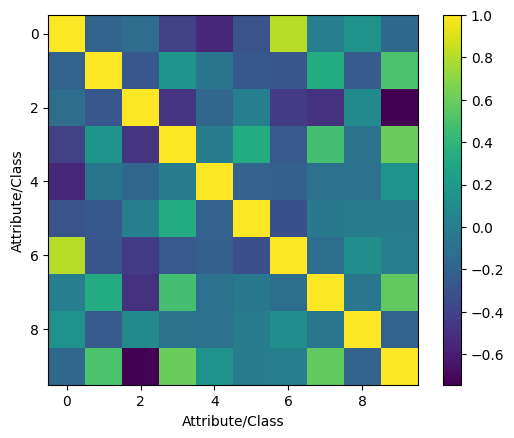

In [55]:
# First, calculate Pearson correlation coefficients for all pairs of features
for feature_i in range(number_of_features): 
    for feature_j in range(number_of_features):
        corr, _ = stats.pearsonr(X.iloc[:, feature_i], X.iloc[:, feature_j])
        correlation_matrix[feature_i][feature_j] = corr

# Then, calculate Pearson correlation coefficients for each feature with the target variable
for feature_i in range(number_of_features): 
    target_i = number_of_features
    corr, _ = stats.pearsonr(X.iloc[:, feature_i], y)
    correlation_matrix[feature_i][target_i] = corr
    correlation_matrix[target_i][feature_i] = corr

# Finally, calculate Pearson correlation coefficient for the target variable with itself (this is always 1)
corr, _ = stats.pearsonr(y, y)
correlation_matrix[target_i][target_i] = corr

# Plotting the correlation matrix
plt.figure()
plt.imshow(correlation_matrix)
plt.xlabel("Attribute/Class")
plt.ylabel("Attribute/Class")
plt.colorbar()
plt.show()


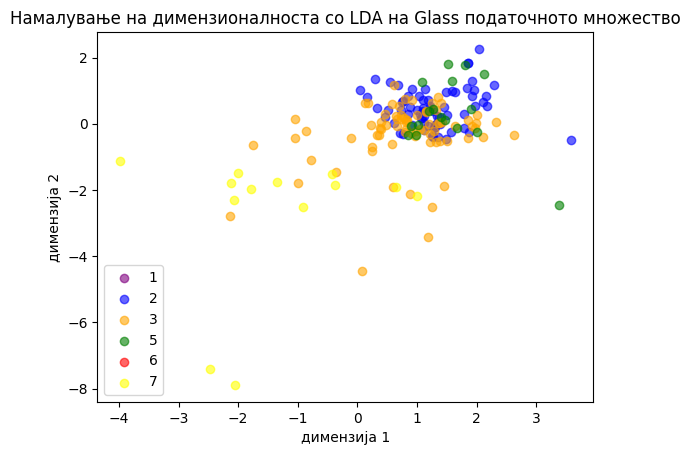

In [59]:
LDA_reduce = LinearDiscriminantAnalysis(n_components=2) # Го поставуваме бројот ан компоненти во новиот простор на 2 
LDA_reduce.fit(X, y) # Го фитуваме LDA моделот на податоците X и y
X_reduced = LDA_reduce.transform(X) # Со помош на фитуваниот модел ги трансформираме влезните податоци X во но новите X_LDA

# Сега можеме да го визуелизираме податочното множество на еден дводимензионален график
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2,3,4,5,6,7], target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], alpha=.6, color=color,
                label=target_name)
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Намалување на димензионалноста со LDA на Glass податочното множество')
plt.show()

In [ ]:
#PODELBA NA PODATOCHNOTO MNOZHESTVO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [62]:
#KVADRATNA DISKRIMINATVINA ANALIZA
QDA= QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of p

QuadraticDiscriminantAnalysis()

In [63]:
print("Приорните веројатности на класите се",QDA.priors_)

Приорните веројатности на класите се [0.34228188 0.3557047  0.08724832 0.04697987 0.04026846 0.12751678]


In [67]:
y_pred = QDA.predict(X_test)
QDA_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со QDA во оригиналното п.множ. е", round(QDA_accuracy,3))

Точноста на класификацијата со QDA во оригиналното п.множ. е 0.062


C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Marija\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:1055: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [66]:
#KLASIFIKACIJA SO LINEARNA DISKRIMINATIVNA ANALIZA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со LDA во оригиналното п.множ. е",round(LDA_accuracy,3))

Точноста на класификацијата со LDA во оригиналното п.множ. е 0.646


In [70]:
#KLASIFIKACIJA SO NAIVEN BAESOV KLASIFIKATOR
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_accuracy = accuracy_score(y_test, y_pred)
print("Точноста на класификацијата со GNB во оригиналното п.множ. е",round(GNB_accuracy,3))

Точноста на класификацијата со GNB во оригиналното п.множ. е 0.308


In [72]:
#KLASIFIKACIJA VO REDUCIRANO P.MNOZH.
QDA_reduced = QuadraticDiscriminantAnalysis()
QDA_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = QDA_reduced.predict(X_reduced_test)
QDA_reduced_accuracy = accuracy_score(y_test, y_pred)
print("Точноста на класификацијата со методот QDA во редуцирано п.множ. е", round(QDA_reduced_accuracy,3))

Точноста на класификацијата со методот QDA во редуцирано п.множ. е 0.615


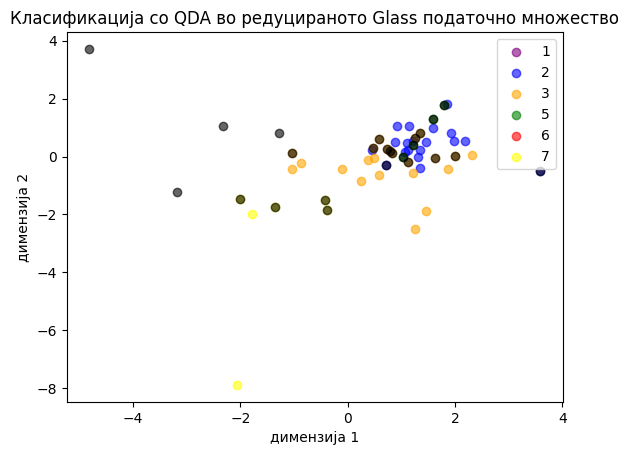

In [74]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
    plt.scatter(X_reduced_test[y_test == i, 0], X_reduced_test[y_test == i, 1], alpha=.6, color=color,
                label=target_name)

incorrect = y_pred!=y_reduced_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")
        
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со QDA во редуцираното Glass податочно множество');

In [75]:
LDA_reduced = LinearDiscriminantAnalysis(solver='lsqr')
LDA_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = LDA_reduced.predict(X_reduced_test)
LDA_reduced_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со методот LDA во редуцирано п.множ. е", round(LDA_reduced_accuracy,3))

Точноста на класификацијата со методот LDA во редуцирано п.множ. е 0.692


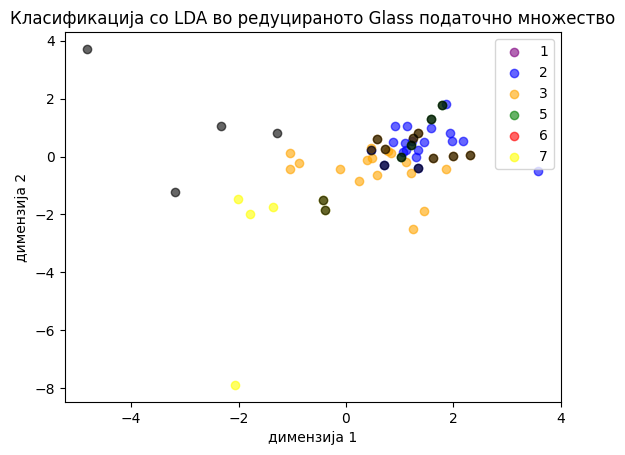

In [77]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(X_reduced_test[y_test == i, 0], X_reduced_test[y_test == i, 1], alpha=.6, color=color,
                label=target_name)

incorrect = y_pred!=y_reduced_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")
        
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со LDA во редуцираното Glass податочно множество');

In [78]:
GNB_reduced = GaussianNB()
GNB_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = GNB_reduced.predict(X_reduced_test)
GNB_reduced_accuracy = accuracy_score(y_test,y_pred)
print("Точноста на класификацијата со методот GNB во редуцирано п.множ. е", round(GNB_reduced_accuracy,3))

Точноста на класификацијата со методот GNB во редуцирано п.множ. е 0.631


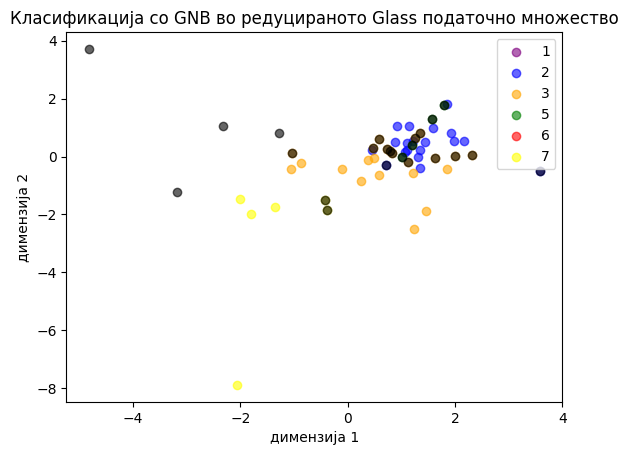

In [80]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
    plt.scatter(X_reduced_test[y_test == i, 0], X_reduced_test[y_test == i, 1], alpha=.6, color=color,
                label=target_name)

incorrect = y_pred!=y_reduced_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")
        
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со GNB во редуцираното Glass податочно множество');

In [82]:
#VIZUELIZACIJA NA ISTRENIRANITE MODELI
from scipy import linalg
from matplotlib import colors
import matplotlib as mpl

def plot_data(lda, X, y, y_pred):
    splot = plt.subplot(1, 1, 1) 
    
    true = y == y_pred  # Точно предвидени класи
    true0, true1, true2, true3, true5, true6 = true[y == 0], true[y == 1], true[y == 2], true[y == 3], true[y == 5], true[y == 6]
    X0, X1, X2, X3, X5, X6 = X[y == 0], X[y == 1], X[y == 2], X[y == 3], X[y == 5], X[y == 6]
    X0_true, X0_false = X0[true0], X0[~true0]
    X1_true, X1_false = X1[true1], X1[~true1]
    X2_true, X2_false = X2[true2], X2[~true2]
    X3_true, X3_false = X3[true3], X3[~true3]
    X5_true, X5_false = X5[true5], X5[~true5]
    X6_true, X6_false = X6[true6], X6[~true6]

    # Исцртување на примероците од сите класи
    plt.scatter(X0_true[:, 0], X0_true[:, 1], alpha=.6, color="purple",label='0')
    plt.scatter(X0_false[:, 0], X0_false[:, 1], marker="x", s=20, color="purple")

    plt.scatter(X1_true[:, 0], X1_true[:, 1],  alpha=.6, color="blue",label='1')
    plt.scatter(X1_false[:, 0], X1_false[:, 1], marker="x", s=20, color="blue")
    
    plt.scatter(X2_true[:, 0], X2_true[:, 1],  alpha=.6, color="orange",label='2')
    plt.scatter(X2_false[:, 0], X2_false[:, 1], marker="x", s=20, color="orange")

    plt.scatter(X3_true[:, 0], X3_true[:, 1],  alpha=.6, color="orange",label='3')
    plt.scatter(X3_false[:, 0], X3_false[:, 1], marker="x", s=20, color="yellow")

    plt.scatter(X5_true[:, 0], X5_true[:, 1],  alpha=.6, color="orange",label='5')
    plt.scatter(X5_false[:, 0], X5_false[:, 1], marker="x", s=20, color="red")

    plt.scatter(X6_true[:, 0], X6_true[:, 1],  alpha=.6, color="orange",label='6')
    plt.scatter(X6_false[:, 0], X6_false[:, 1], marker="x", s=20, color="green")

    # Исцртување на границите на одлука
    nx, ny = 100, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5],colors="black")

    # Исцртување на средните вредности за сеекоја од класите
    plt.plot(lda.means_[0][0],lda.means_[0][1],"s",color="purple",markersize=15)
    plt.plot(lda.means_[1][0],lda.means_[1][1],"s",color="blue",markersize=15)
    plt.plot(lda.means_[2][0],lda.means_[2][1],"s",color="orange",markersize=15)
    plt.plot(lda.means_[2][2],lda.means_[3][0],"s",color="yellow",markersize=15)
    plt.plot(lda.means_[3][1],lda.means_[3][2],"s",color="red",markersize=15)
    plt.plot(lda.means_[3][3],lda.means_[4][0],"s",color="green",markersize=15)
    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi
    ell = mpl.patches.Ellipse(mean,2*v[0]**0.5,2*v[1]**0.5,angle=180+angle,facecolor=color)
    ell.set_clip_box(splot.axes.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "purple")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")
    plot_ellipse(splot, lda.means_[2], lda.covariance_, "orange")
    plot_ellipse(splot, lda.means_[3], lda.covariance_, "yellow")
    plot_ellipse(splot, lda.means_[5], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[6], lda.covariance_, "green")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "purple")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")
    plot_ellipse(splot, qda.means_[2], qda.covariance_[2], "orange")
    plot_ellipse(splot, qda.means_[3], qda.covariance_, "yellow")
    plot_ellipse(splot, qda.means_[5], qda.covariance_, "red")
    plot_ellipse(splot, qda.means_[6], qda.covariance_, "green")

IndexError: index 2 is out of bounds for axis 0 with size 2

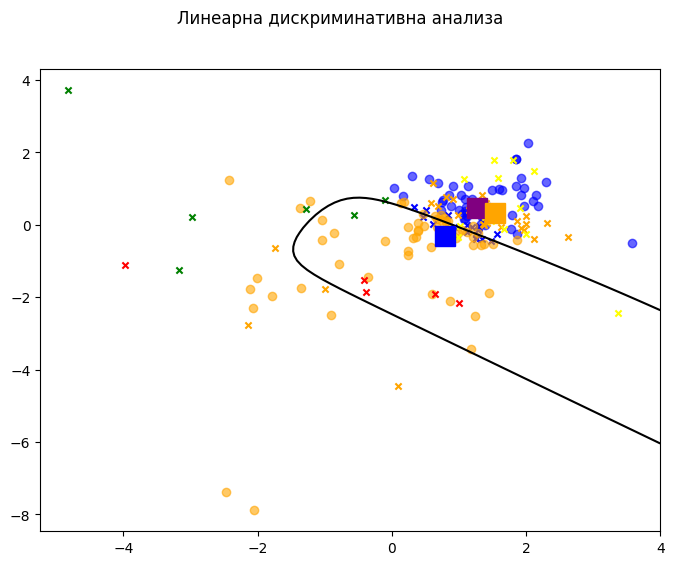

In [83]:
plt.figure(figsize=(8, 6))
plt.suptitle("Линеарна дискриминативна анализа")

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_reduced, y).predict(X_reduced)
splot = plot_data(lda, X_reduced, y, y_pred)
plot_lda_cov(lda, splot)
plt.axis("tight")
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.tight_layout()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

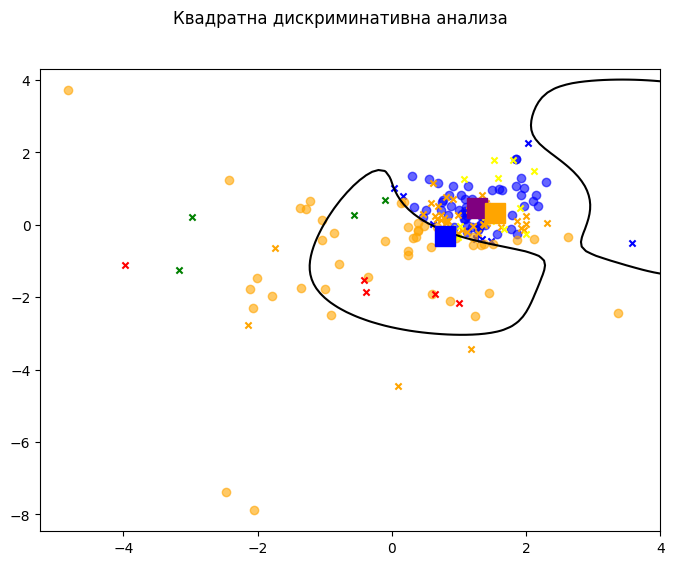

In [84]:
plt.figure(figsize=(8, 6))
plt.suptitle("Квадратна дискриминативна анализа")

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_reduced, y).predict(X_reduced)
splot = plot_data(qda, X_reduced, y, y_pred)
plot_qda_cov(qda, splot)
plt.axis("tight")
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.tight_layout()
plt.show()